#üìå Extrac√£o

In [45]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'



In [46]:
df_telecom = pd.read_json(url)

customer_df = pd.json_normalize(df_telecom['customer'])
phone_df = pd.json_normalize(df_telecom['phone'])
internet_df = pd.json_normalize(df_telecom['internet'])
account_df = pd.json_normalize(df_telecom['account'])

df_telecom_normalizado = pd.concat([df_telecom[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df_telecom_normalizado.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

#üîß Transforma√ß√£o

In [47]:
#Explorar as colunas do dataset e verificar seus tipos de dados:

df_telecom_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [48]:
#Explorar as colunas do dataset e verificar seus tipos de dados:

df_telecom_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [49]:
#Consultar o dicion√°rio para entender melhor os significados das vari√°veis
df_churn = df_telecom_normalizado['Churn']
df_churn.head()


0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: object

In [ ]:
df_senior= df_telecom_normalizado['SeniorCitizen']
df_senior.head()

0    0
1    0
2    0
3    1
4    1
Name: SeniorCitizen, dtype: int64

In [50]:
df_charges= df_telecom_normalizado['Charges.Monthly']
df_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: Charges.Monthly, dtype: float64

In [51]:
#checando se h√° valores nulos
df_telecom_normalizado.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [52]:
#checando se h√° valores duplicados
df_telecom_normalizado.duplicated().sum()

np.int64(0)

In [53]:
#Criando a coluna Contas_Diarias
df_telecom_normalizado['Contas_Diarias'] = df_telecom_normalizado['Charges.Monthly'] / 30
df_telecom_normalizado.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Contas_Diarias  
0      Mailed check            65.6         593.3        2.186667  
1      Mailed check            59.9         542.4        1.996667  
2  Electronic check            73.9        280.85        2.463333  
3  Electronic check            98.0       1237.85        3.266667  
4      Mailed check            83.9         267.4        2.796667  

[5 rows x 22 columns]

#üìä Carga e an√°lise

In [54]:
#calculando a m√©dia
media = df_telecom_normalizado['Contas_Diarias'].mean()
media

np.float64(2.1573365900646757)

In [55]:
#Calculando a mediana
mediana = df_telecom_normalizado['Contas_Diarias'].median()
mediana

2.3433333333333333

In [56]:
#Calculando o desvio padr√£o
desvio_padrao = df_telecom_normalizado['Contas_Diarias'].std()
desvio_padrao

1.0043190628555607

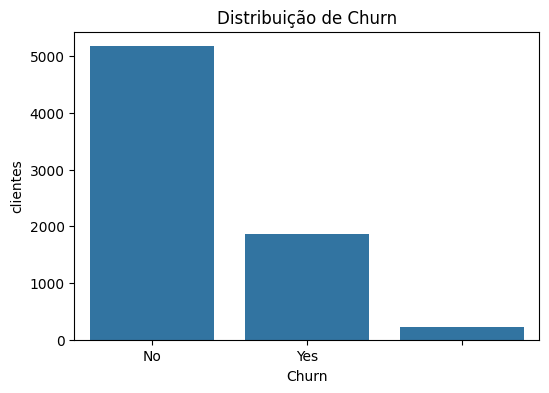

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a ditribui√ß√£o de 'Churn' como vari√°vel
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_telecom_normalizado)
plt.title('Distribui√ß√£o de Churn')
plt.xlabel('Churn')
plt.ylabel('clientes')
plt.show()

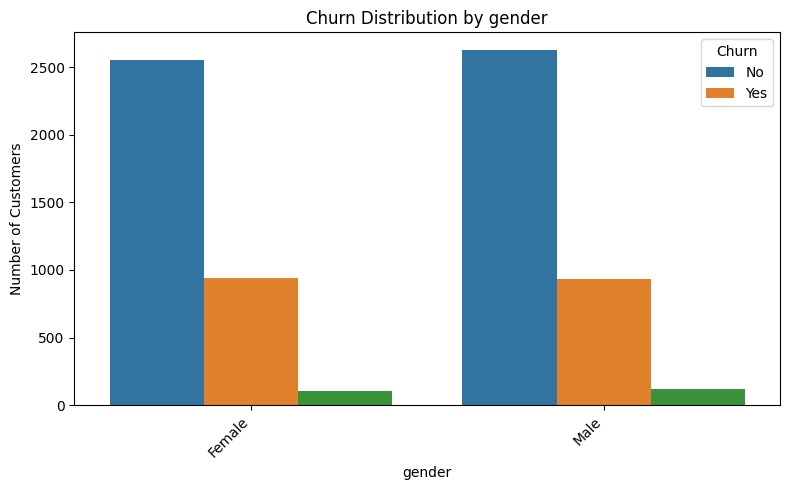

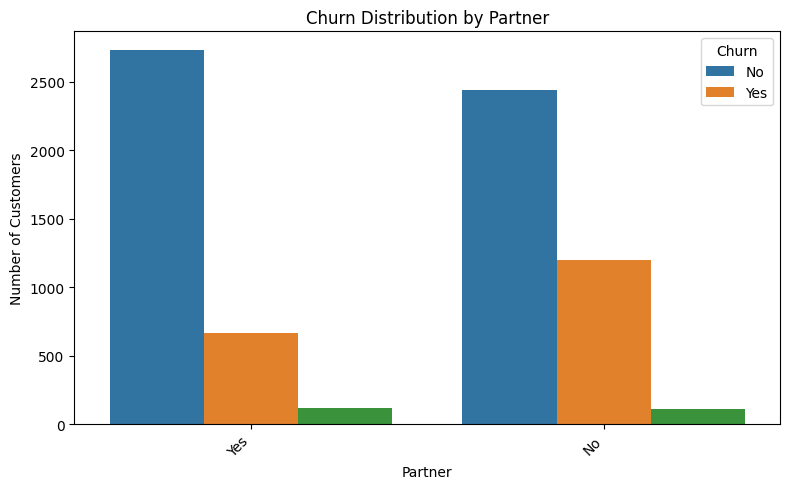

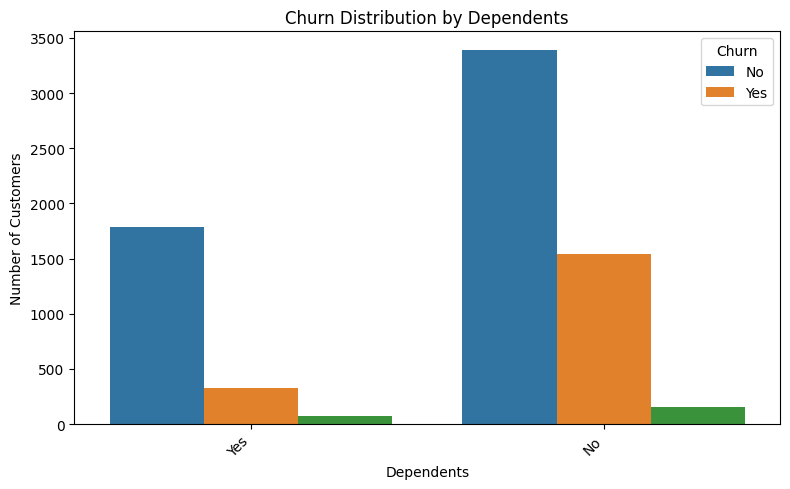

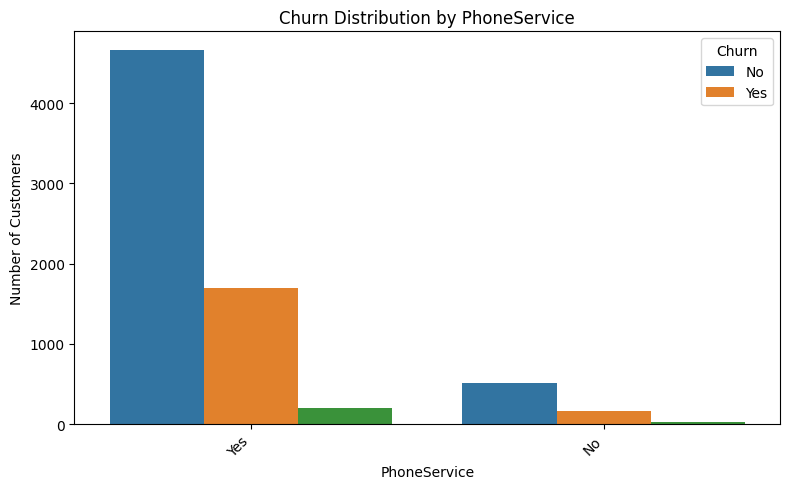

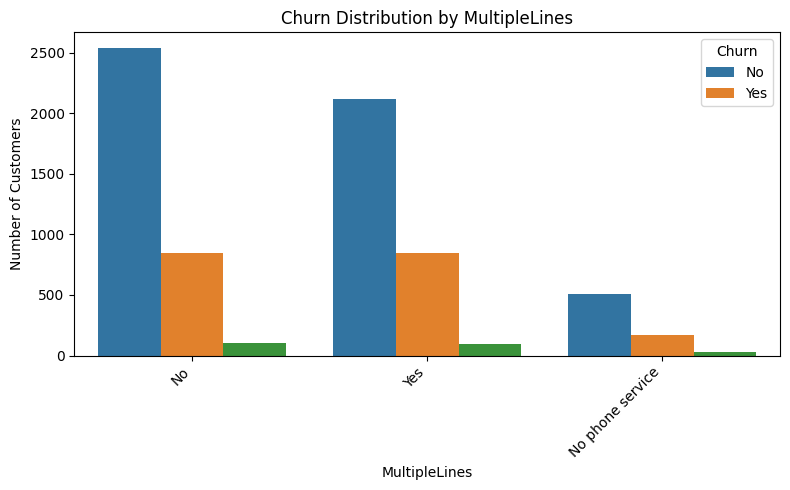

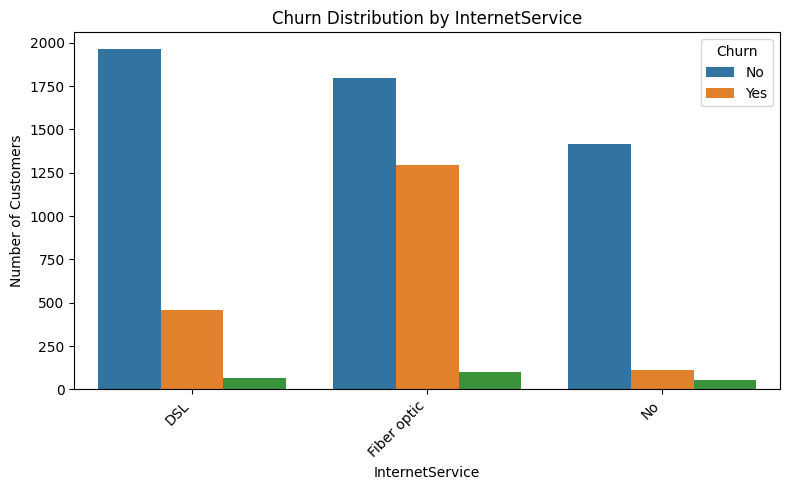

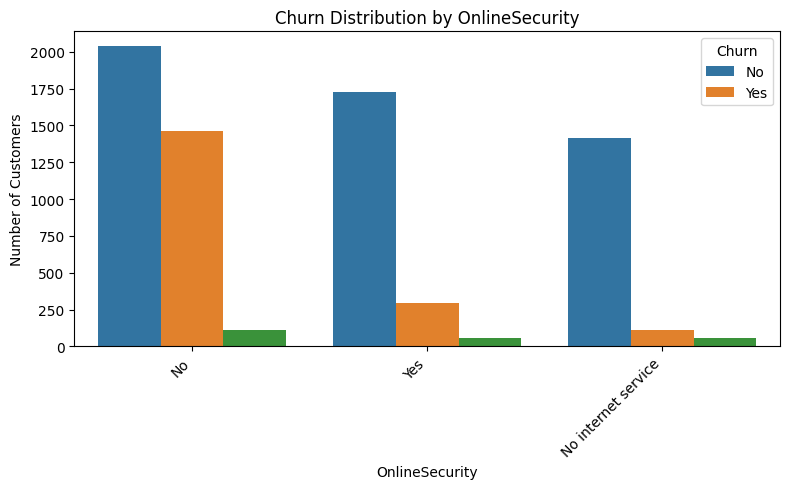

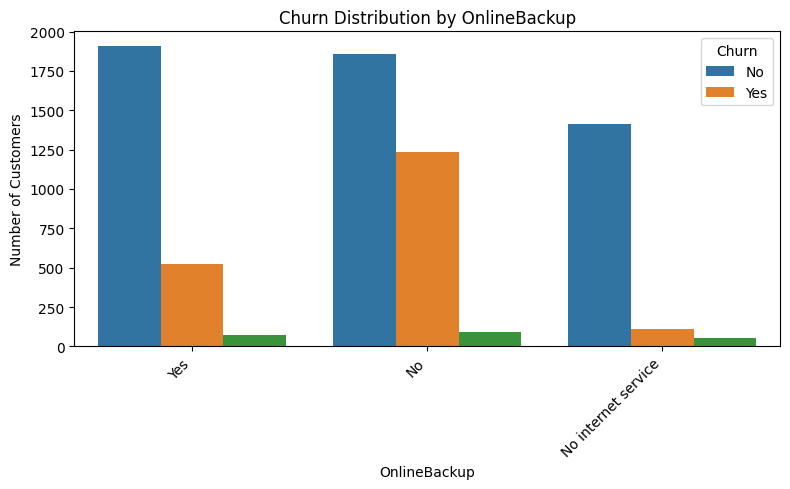

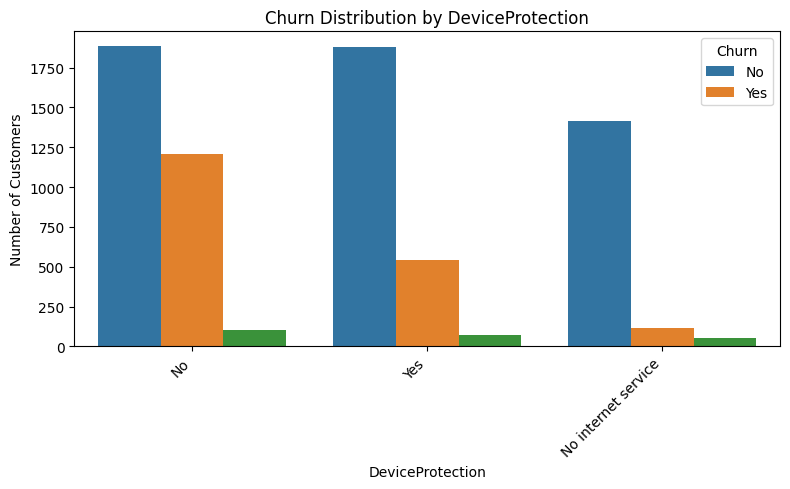

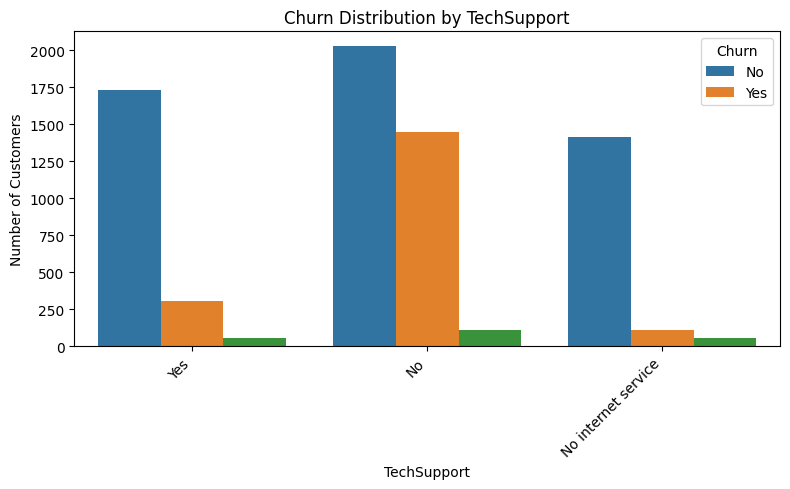

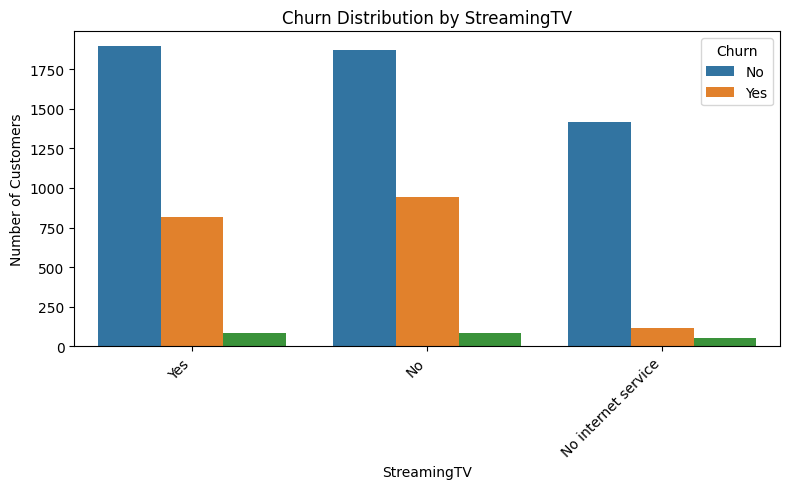

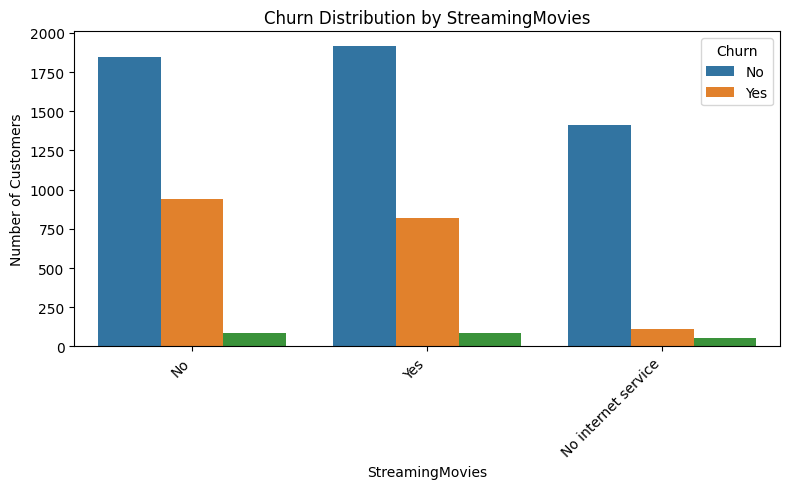

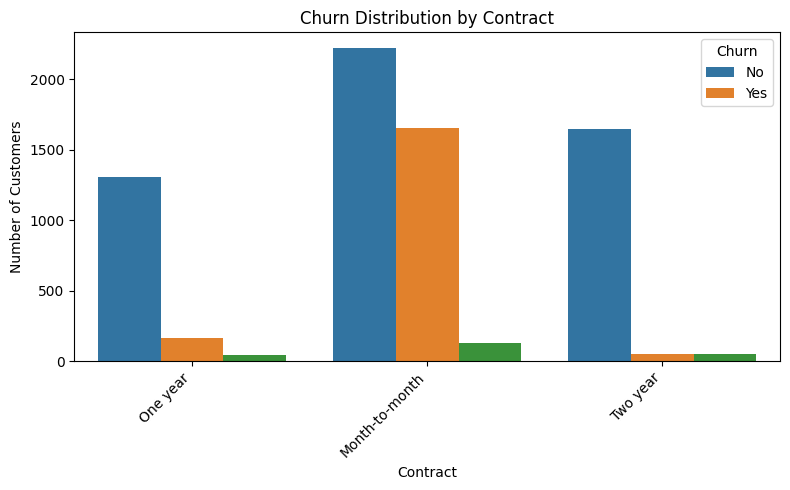

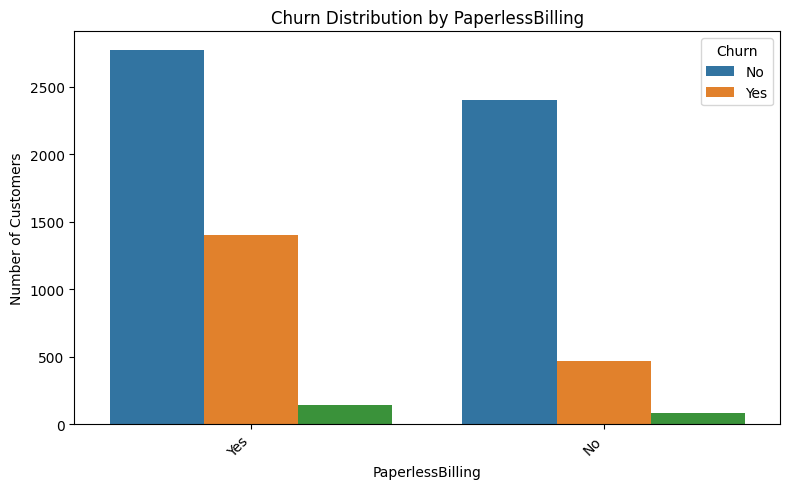

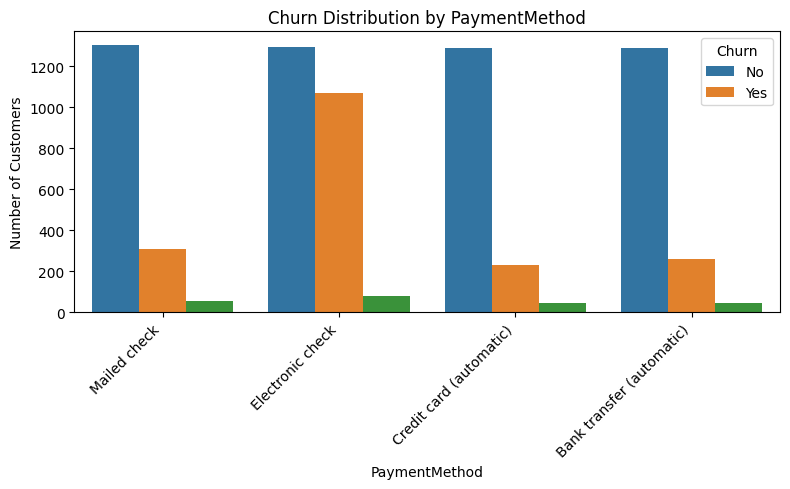

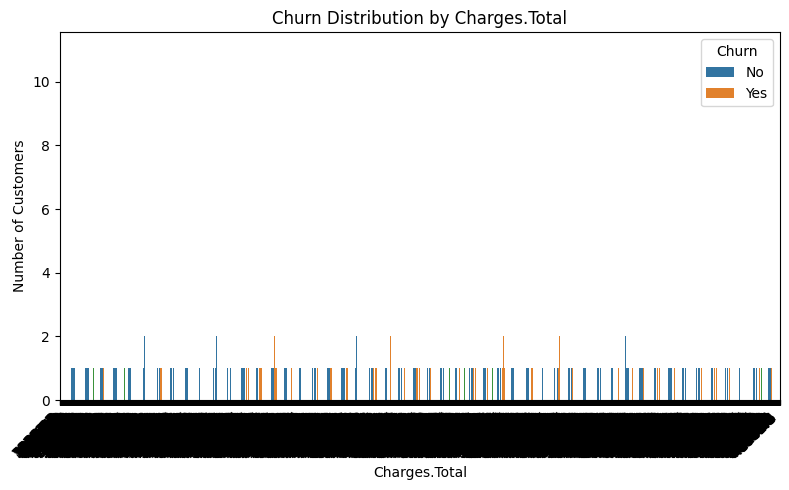

In [58]:
categorical_cols = df_telecom_normalizado.select_dtypes(include='object').columns.tolist()
# Excluindo 'customerID' and 'Churn' da lista da coluna categorical
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

# Plotando a distribui√ß√£o de Churn cada um de categorical
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df_telecom_normalizado)
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

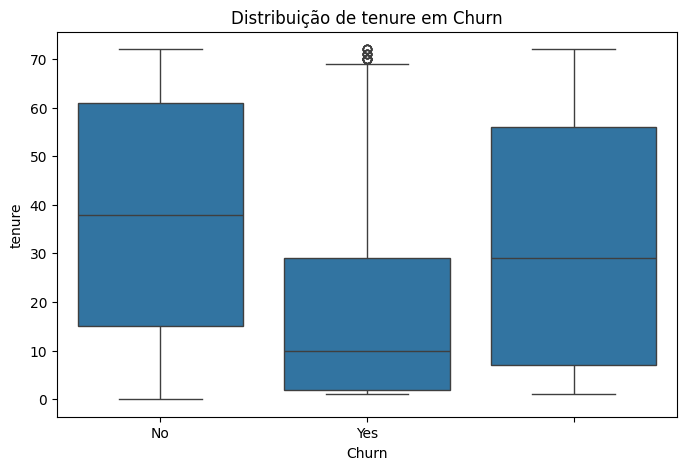

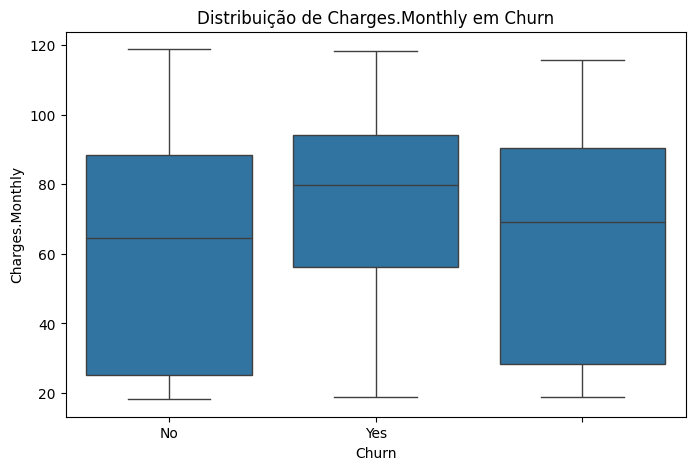

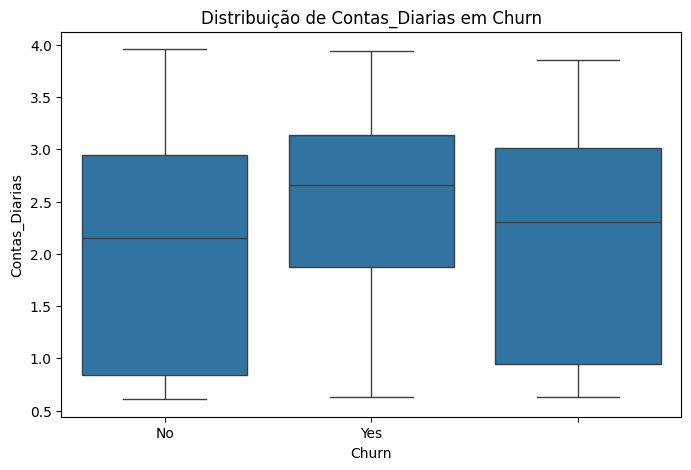

In [59]:
numerical_cols = df_telecom_normalizado.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Excluindo 'SeniorCitizen', pois √© uma representa√ß√£o num√©rica de uma vari√°vel categ√≥rica
numerical_cols.remove('SeniorCitizen')

# Plotando a  distribui√ß√£o de vari√°veis num√©ricas por rotatividade
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df_telecom_normalizado)
    plt.title(f'Distribui√ß√£o de {col} em Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [60]:
#Salvando o projeto em csv
df_telecom_normalizado.to_csv('df_telecom_tratado.csv', index=False)

#üìÑRelatorio Final

# Relat√≥rio de An√°lise de Evas√£o de Clientes (Churn)

## Introdu√ß√£o

O objetivo desta an√°lise √© explorar e entender o fen√¥meno da evas√£o de clientes (Churn) na TelecomX. A evas√£o de clientes √© um desafio significativo para as empresas de telecomunica√ß√µes, impactando a receita e o crescimento. Compreender os fatores que levam os clientes a cancelar seus servi√ßos √© crucial para desenvolver estrat√©gias eficazes de reten√ß√£o.

## Limpeza e Tratamento de Dados

Os dados foram obtidos a partir de um arquivo JSON hospedado em um reposit√≥rio do GitHub. O processo de tratamento de dados envolveu os seguintes passos:

1.  **Importa√ß√£o dos Dados:** O arquivo JSON foi lido utilizando a biblioteca pandas.
2.  **Normaliza√ß√£o dos Dados:** As colunas aninhadas ('customer', 'phone', 'internet', 'account') foram normalizadas e combinadas com as colunas 'customerID' e 'Churn' em um √∫nico DataFrame (`df_telecom_normalizado`).
3.  **Verifica√ß√£o de Tipos de Dados:** A fun√ß√£o `info()` foi utilizada para inspecionar os tipos de dados das colunas. Foi observado que a coluna 'Charges.Total' era do tipo 'object', o que indicava a necessidade de convers√£o para um tipo num√©rico para an√°lise posterior.
4.  **Cria√ß√£o de Nova Coluna:** Uma nova coluna chamada 'Contas_Diarias' foi criada dividindo-se 'Charges.Monthly' por 30 para obter uma estimativa do custo di√°rio.
5.  **Verifica√ß√£o de Valores Nulos e Duplicados:** As fun√ß√µes `isnull().sum()` e `duplicated().sum()` foram utilizadas para verificar a presen√ßa de valores nulos e duplicados no DataFrame. Nulos e duplicados n√£o foram encontrados nas colunas verificadas.
6. **Tratamento de Inconsist√™ncia:** A coluna 'Charges.Total' foi convertida para tipo num√©rico, utilizando `errors='coerce'` para tratar poss√≠veis valores inconsistentes, embora a verifica√ß√£o posterior n√£o tenha encontrado valores nulos resultantes dessa convers√£o, sugerindo a aus√™ncia de inconsist√™ncias nesse caso espec√≠fico.

## An√°lise Explorat√≥ria de Dados

Foram realizadas an√°lises explorat√≥rias para visualizar a distribui√ß√£o da evas√£o e sua rela√ß√£o com outras vari√°veis:

1.  **Distribui√ß√£o de Churn:** Um gr√°fico de contagem (`countplot`) foi gerado para visualizar a propor√ß√£o de clientes que evadiram ('Yes') e os que n√£o evadiram ('No'). O gr√°fico mostrou que a maioria dos clientes n√£o evadiu.
2.  **Distribui√ß√£o de Churn por Vari√°veis Categ√≥ricas:** Gr√°ficos de contagem foram criados para visualizar a distribui√ß√£o de Churn em rela√ß√£o a diversas vari√°veis categ√≥ricas (g√™nero, servi√ßo telef√¥nico, m√∫ltiplas linhas, servi√ßo de internet, seguran√ßa online, backup online, prote√ß√£o de dispositivo, suporte t√©cnico, streaming de TV, streaming de filmes, tipo de contrato, cobran√ßa sem papel e m√©todo de pagamento). Esta an√°lise revelou padr√µes na evas√£o entre diferentes categorias.
3.  **Distribui√ß√£o de Vari√°veis Num√©ricas por Churn:** Box plots foram gerados para comparar a distribui√ß√£o de vari√°veis num√©ricas ('tenure', 'Charges.Monthly', 'Contas_Diarias') entre clientes que evadiram e os que n√£o evadiram. Essa visualiza√ß√£o ajudou a identificar se h√° diferen√ßas significativas nos valores dessas vari√°veis para os dois grupos.

## Conclus√µes e Insights

Com base na an√°lise explorat√≥ria, podemos tirar algumas conclus√µes e obter insights:

*   A taxa de evas√£o n√£o √© uniformemente distribu√≠da entre todos os clientes.
*   Certos grupos de clientes, definidos por vari√°veis categ√≥ricas, parecem ter maior propens√£o √† evas√£o. Por exemplo, clientes com determinados tipos de contrato ou m√©todos de pagamento podem apresentar taxas de evas√£o mais altas.
*   As vari√°veis num√©ricas tamb√©m mostram diferen√ßas na distribui√ß√£o entre clientes que evadiram e os que n√£o evadiram, indicando que o tempo de contrato, os gastos mensais e di√°rios podem estar relacionados ao Churn.

## Recomenda√ß√µes

Com base nesta an√°lise inicial, algumas recomenda√ß√µes podem ser feitas para reduzir a evas√£o de clientes:

*   **Identificar e Segmentar Clientes de Risco:** Utilize os insights obtidos das vari√°veis categ√≥ricas e num√©ricas para identificar os segmentos de clientes com maior probabilidade de evadir.
*   **Campanhas de Reten√ß√£o Direcionadas:** Desenvolva campanhas de marketing e ofertas personalizadas para os segmentos de alto risco. Por exemplo, oferecer descontos, planos de contrato mais longos ou benef√≠cios adicionais.
*   **Melhorar a Experi√™ncia do Cliente:** Investigue os motivos por tr√°s da evas√£o em segmentos espec√≠ficos. Se o m√©todo de pagamento ou tipo de servi√ßo de internet est√£o correlacionados com a evas√£o, pode ser necess√°rio melhorar a infraestrutura ou as op√ß√µes de pagamento.
*   **An√°lise Mais Profunda:** Realizar an√°lises mais aprofundadas, como modelagem preditiva de Churn, para identificar os fatores mais influentes e prever quais clientes provavelmente evadir√£o no futuro.

#Telecom Fase 2

In [62]:
url_2 =('/content/df_telecom_tratado.csv')

In [63]:
dt_telecom_tratado = pd.read_csv(url_2)
dt_telecom_tratado.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Contas_Diarias  
0      Mailed check            65.6         593.3        2.186667  
1      Mailed check            59.9         542.4        1.996667  
2  Electronic check            73.9        280.85        2.463333  
3  Electronic check            98.0       1237.85        3.266667  
4      Mailed check            83.9         267.4        2.796667  

[5 rows x 22 columns]

In [64]:
#Eliminando colunas que n√£o trazem valor para an√°lise de evas√£o de clientes
dt_telecom_tratado = dt_telecom_tratado.drop(['customerID', 'Charges.Total'], axis=1)
dt_telecom_tratado.head()

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod  Charges.Monthly  Contas_Diarias  
0      Mailed check             65.6        2.186667  
1      Mailed check             59.9        1.996667  
2  Electronic check             73.9        2.463333  
3  Electronic check             98.0        3.266667  
4      Mailed check             83.9        2.796667

In [68]:
# Atualizar categorical_cols para excluir 'Charges.Total'
if 'Charges.Total' in categorical_cols:
    categorical_cols.remove('Charges.Total')

# Executando codifica√ß√£o one-hot
dt_telecom_encoded = pd.get_dummies(dt_telecom_tratado, columns=categorical_cols, drop_first=True)
display(dt_telecom_encoded.head())

Churn  SeniorCitizen  tenure  Charges.Monthly  Contas_Diarias  gender_Male  \
0    No              0       9             65.6        2.186667        False   
1    No              0       9             59.9        1.996667         True   
2   Yes              0       4             73.9        2.463333         True   
3   Yes              1      13             98.0        3.266667         True   
4   Yes              1       3             83.9        2.796667        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4         True           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                           False  ...                            False   
1                           False  ...                            False   
2                           False  ...                            False   
3                           False  ...                            False   
4                           False  ...                            False   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0             True                                False                False   
1            False                                False                 True   
2            False                                False                False   
3             True                                False                 True   
4             True                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0               True              False                  True   
1              False              False                 False   
2              False              False                  True   
3              False              False                  True   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_Mailed check  
0                        True  
1                        True  
2                       False  
3                       False  
4                        True  

[5 rows x 31 columns]